## Gerekli olan kütüphanelerin yüklenmesi

In [129]:
#dataset
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


#sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
import sklearn.metrics as sm

#apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Veriye genel bir bakış

In [130]:
data = pd.read_csv("internet_session.csv")

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4712 non-null   object 
 1   start_time             4712 non-null   object 
 2   usage_time             4712 non-null   object 
 3   IP                     4712 non-null   object 
 4   MAC                    4712 non-null   object 
 5   upload                 4712 non-null   object 
 6   download               4712 non-null   object 
 7   total_transfer         4712 non-null   float64
 8   seession_break_reason  4712 non-null   object 
dtypes: float64(1), object(8)
memory usage: 331.4+ KB


In [131]:
data.head()

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,5/10/2022 2:59,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,5/10/2022 18:53,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,5/10/2022 21:20,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080,195153.92,209233.92,Idle-Timeout
3,user1,5/11/2022 0:37,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,5/11/2022 2:59,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout


In [133]:
data.isnull().sum()

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

seession_break_reason  sütununda  9 adet eksik veri gözlemlendi

In [134]:
data[data.seession_break_reason.isna()]

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
673,user1,11/5/2022 18:41,00:02:57:27,10.55.2.241,48:E7:DA:58:22:E9,303216.64,148879.36,452096.00,NaN
1130,user2,11/5/2022 18:22,00:04:11:28,10.55.14.3,CA:48:87:B2:A5:12,28149.76,547061.76,575201.28,NaN
1649,user3,11/5/2022 18:28,00:04:07:29,10.55.15.20,C8:3D:DC:CF:16:C6,33454.08,595537.92,628992.00,NaN
2375,user4,11/5/2022 19:23,00:03:05:48,10.55.13.199,D8:9C:67:BA:DC:B9,11171.84,19466.24,30638.08,NaN
2376,user4,11/5/2022 21:50,00:00:39:38,10.55.11.248,92:02:4F:EE:EB:3F,4966.4,88340.48,93296.64,NaN
2712,user5,11/5/2022 19:43,00:02:15:54,10.55.15.44,C2:BB:83:2B:FF:5A,14325.76,205967.36,220303.36,NaN
3913,user7,11/5/2022 19:38,00:02:30:43,10.55.0.215,F8:89:D2:D4:AE:8B,40919.04,1205862.4,1247805.44,NaN
3914,user7,11/5/2022 21:54,00:00:14:26,10.55.12.31,C6:2C:1D:5E:86:70,1007.5,8529.92,9543.68,NaN
4711,user9,11/5/2022 20:55,00:01:06:20,10.55.2.33,DA:2F:97:0E:B7:D0,21237.76,298536.96,319774.72,NaN


In [135]:
empty_indexes = data[data.seession_break_reason.isna()].index
user_list = data[data.seession_break_reason.isna()]["name"].unique()
user_list

array(['user1', 'user2', 'user3', 'user4', 'user5', 'user7', 'user9'],
      dtype=object)

In [136]:
# Buradaki oturumların sonlanma nedenindeki eksik bilgiler her bir kullanıcının en çok karşılaştığı sorun ile doldurduk.

In [137]:
for i in empty_indexes:
    nm = data.loc[i]["name"]
    imp_val = data[data.name==nm]["seession_break_reason"].value_counts().index[0]
    data.loc[i,"seession_break_reason"] = imp_val
data[data.seession_break_reason.isna()]

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason


In [138]:
data.loc[empty_indexes]

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
673,user1,11/5/2022 18:41,00:02:57:27,10.55.2.241,48:E7:DA:58:22:E9,303216.64,148879.36,452096.00,Idle-Timeout
1130,user2,11/5/2022 18:22,00:04:11:28,10.55.14.3,CA:48:87:B2:A5:12,28149.76,547061.76,575201.28,Idle-Timeout
1649,user3,11/5/2022 18:28,00:04:07:29,10.55.15.20,C8:3D:DC:CF:16:C6,33454.08,595537.92,628992.00,Idle-Timeout
2375,user4,11/5/2022 19:23,00:03:05:48,10.55.13.199,D8:9C:67:BA:DC:B9,11171.84,19466.24,30638.08,Idle-Timeout
2376,user4,11/5/2022 21:50,00:00:39:38,10.55.11.248,92:02:4F:EE:EB:3F,4966.4,88340.48,93296.64,Idle-Timeout
2712,user5,11/5/2022 19:43,00:02:15:54,10.55.15.44,C2:BB:83:2B:FF:5A,14325.76,205967.36,220303.36,Idle-Timeout
3913,user7,11/5/2022 19:38,00:02:30:43,10.55.0.215,F8:89:D2:D4:AE:8B,40919.04,1205862.4,1247805.44,Idle-Timeout
3914,user7,11/5/2022 21:54,00:00:14:26,10.55.12.31,C6:2C:1D:5E:86:70,1007.5,8529.92,9543.68,Idle-Timeout
4711,user9,11/5/2022 20:55,00:01:06:20,10.55.2.33,DA:2F:97:0E:B7:D0,21237.76,298536.96,319774.72,Idle-Timeout


In [139]:
data.isnull().sum()

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

Eksikler tamamlandı

In [140]:
#Aykırı değerler

In [141]:
def outlierbilgi(veri):
    Q1 = veri.quantile(0.01) #veriye çok dokunmamak adına uç kısımlarında olan aykırılıkları aldık
    Q3 = veri.quantile(0.90)
    IQR = Q3-Q1
    alt_sinir = Q1 - 1.5*IQR
    ust_sinir = Q3 + 1.5*IQR

    alt_aykiri = (veri<(alt_sinir))
    ust_aykiri = (veri>(ust_sinir))
    tum_aykiri = (alt_aykiri | ust_aykiri)
    
    print("Toplam Gözlem Sayisi :",veri.shape[0])
    print("Ortalama : ",veri.mean())
    print("Alt sinir değeri :"+ "%2f" % (alt_sinir))
    print("Üst sinir değeri :"+ "%2f" % (ust_sinir))
    print("Toplam Aykırı Gözlem : " ,veri[alt_aykiri].shape[0]+veri[ust_aykiri].shape[0])
    print(veri[tum_aykiri])
    print("="*70)
    return alt_sinir,ust_sinir
cols = data.select_dtypes(include = ["float64","int64"])
for i in cols:
    print(f"\n{i} değişkeninin aykırı değerleri\n")
    outlierbilgi(data[i])


total_transfer değişkeninin aykırı değerleri

Toplam Gözlem Sayisi : 4712
Ortalama :  430374.33227928734
Alt sinir değeri :-1465979.978000
Üst sinir değeri :2444748.230000
Toplam Aykırı Gözlem :  85
21       3145728.00
274      2663383.04
300     24389877.76
728      3554672.64
858      3523215.36
           ...     
4595     2474639.36
4654     2789212.16
4696     4812963.84
4700     2789212.16
4707     2495610.88
Name: total_transfer, Length: 85, dtype: float64


## Tip dönüşümleri 

In [143]:
data['start_time'] = pd.to_datetime(data.start_time)
data.insert(1,"start_time1",data['start_time'].dt.time)
data.insert(1,"start_date",data['start_time'].dt.date)
data.drop("start_time",axis=1,inplace=True)
data['start_date'] = data['start_date'].astype("datetime64[ns]")
data.insert(3,"day",data['start_date'].dt.day)
data.insert(4,"month",data['start_date'].dt.month)

In [144]:
data.head()

,name,start_date,start_time1,day,month,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10,02:59:00,10,5,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10,18:53:00,10,5,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10,21:20:00,10,5,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11,00:37:00,11,5,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11,02:59:00,11,5,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout


upload ve download değ. bazılarında "240B" gibi deişkenler ile karşılaşıldı. Bu değerleri Byte olarak aldılayıp KiloByte cinsine dünüştürüldü.

In [145]:
hatali_index = data[data.upload.str.contains("B")]

In [146]:
data.loc[1643,"upload"] = 0.24
data.loc[1643,"download"] = 0.904
data.loc[1652,"upload"] = 0.508

In [147]:
data.upload = pd.to_numeric(data["upload"])
data.download = pd.to_numeric(data["download"])

In [148]:
data.usage_time.sort_values(ascending = True)

1643    00:00:00:01
899     00:00:00:08
4481    00:00:00:09
821     00:00:00:11
1118    00:00:00:11
           ...     
3301    00:19:35:11
588     00:19:35:11
986     00:20:39:52
3780    00:22:00:07
2023    01:00:21:07
Name: usage_time, Length: 4712, dtype: object

In [149]:
data.loc[2023,"usage_time"] ="00:01:21:07"

In [150]:
#usage_time değişkenini datetime formatında yakalayacağız
for i in data.usage_time.index:
    data.loc[i,"usage_time"] = data.usage_time[i][3:]

In [151]:
usage_time_table = pd.to_datetime(data.usage_time, format='%H:%M:%S')
usage_time_table = pd.DataFrame(usage_time_table)
usage_time_table['hour'] = usage_time_table['usage_time'].apply(lambda x: x.hour)
usage_time_table['minute'] = usage_time_table['usage_time'].apply(lambda x: x.minute)
usage_time_table['second'] = usage_time_table['usage_time'].apply(lambda x: x.second)
usage_time_table.insert(1,"name",data.name)
usage_time_table.drop("usage_time",axis=1,inplace=True)
usage_time_table.head()

,name,hour,minute,second
0,user1,0,36,28
1,user1,1,49,56
2,user1,1,35,0
3,user1,0,26,0
4,user1,0,11,52


In [152]:
topsn = []
for i in range(data.shape[0]):
    h,m,s = usage_time_table[["hour","minute","second"]].iloc[i]
    topsn.append(h*3600+m*60+s)
data.drop("usage_time",axis=1,inplace = True)
data.insert(5,"usage_time",topsn)
data

,name,start_date,start_time1,day,month,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10,02:59:00,10,5,2188,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10,18:53:00,10,5,6596,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10,21:20:00,10,5,5700,10.55.2.253,48:E7:DA:58:22:E9,14080.00,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11,00:37:00,11,5,1560,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.40,46049.28,Idle-Timeout
4,user1,2022-05-11,02:59:00,11,5,712,10.55.2.253,48:E7:DA:58:22:E9,22067.20,10772.48,32839.68,Idle-Timeout
...,...,...,...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04,01:11:00,4,11,24872,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout
4708,user9,2022-11-04,10:26:00,4,11,1429,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout
4709,user9,2022-11-04,20:41:00,4,11,5053,10.55.15.186,DA:2F:97:0E:B7:D0,18995.20,373657.60,392652.80,Idle-Timeout
4710,user9,2022-11-05,00:21:00,5,11,31783,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.40,640368.64,Idle-Timeout


## Görselleştirme

In [153]:
user1 = data[data.name=="user1"]
user2 = data[data.name=="user2"]
user3 = data[data.name=="user3"]
user4 = data[data.name=="user4"]
user5 = data[data.name=="user5"]
user6 = data[data.name=="user6"]
user7 = data[data.name=="user7"]
user8 = data[data.name=="user8"]
user9 = data[data.name=="user9"]
users = data.name.unique()

In [154]:
data.corr()

,day,month,usage_time,upload,download,total_transfer
day,1.000000,-0.134697,0.049745,-0.001671,-0.029498,-0.028750
month,-0.134697,1.000000,0.105277,0.053635,0.075590,0.078385
usage_time,0.049745,0.105277,1.000000,0.260361,0.371768,0.385290
upload,-0.001671,0.053635,0.260361,1.000000,0.275290,0.362322
download,-0.029498,0.075590,0.371768,0.275290,1.000000,0.995783
total_transfer,-0.028750,0.078385,0.385290,0.362322,0.995783,1.000000


Text(0.5, 1.0, 'Değişkenlerin korelasyon haritası')

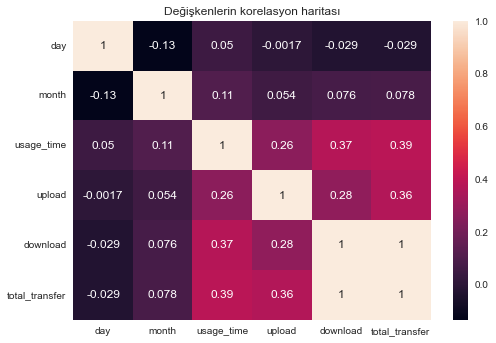

In [155]:
sns.heatmap(data.corr(),annot=True)
plt.title("Değişkenlerin korelasyon haritası")

Korelasyon grafiğinde download ile total_transfer değişkenleri arasında oldukça yüksek (0.995783) bir ilişkiye sahip olduğunu görüyoruz

In [28]:
#Temel Grafikler

In [182]:
user = [user1,user2,user3,user4,user5,user6,user7,user8,user9]

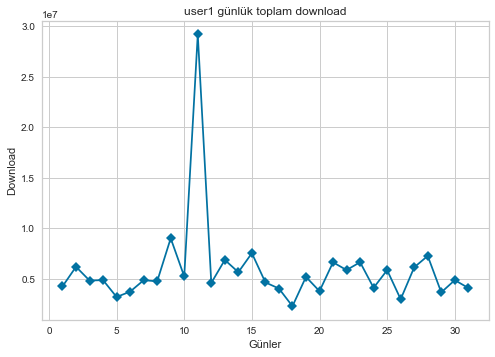

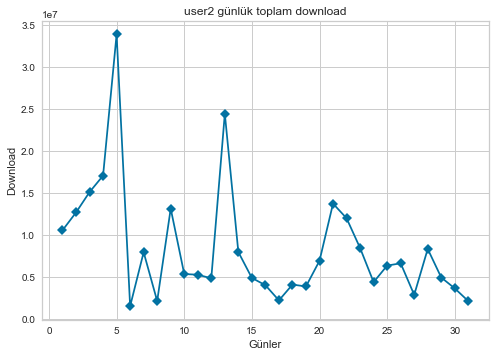

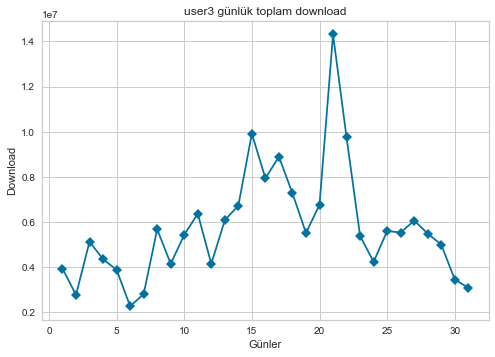

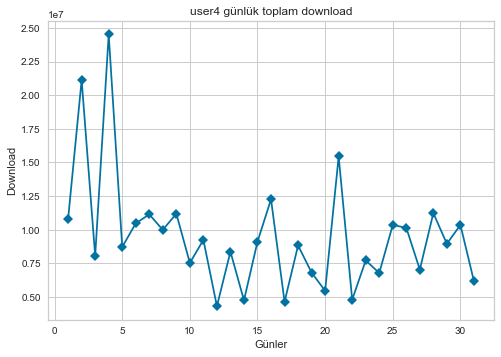

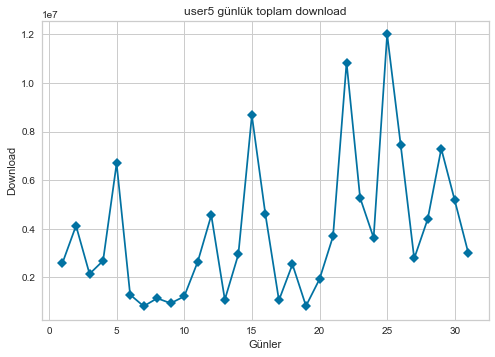

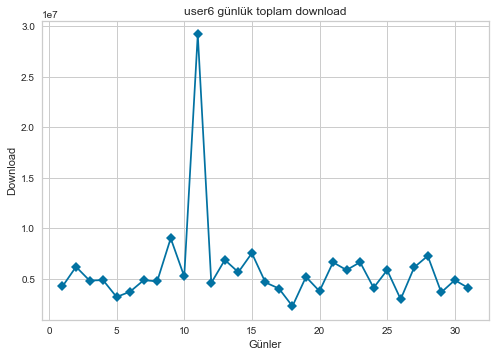

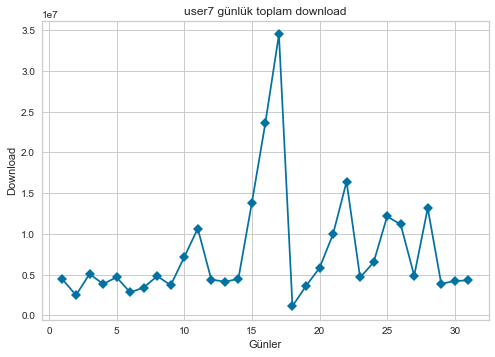

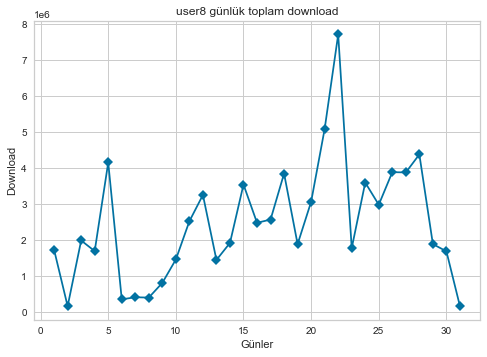

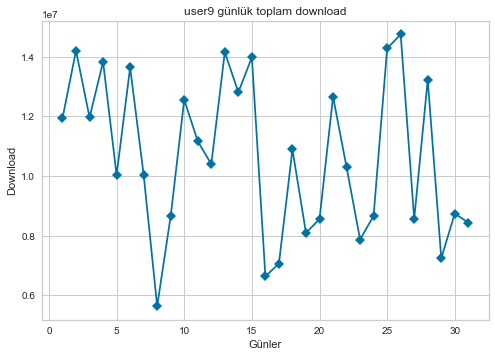

In [188]:
for i in user:
    plt.plot(i.groupby("day").agg({"download":"sum"}),color="b",marker='D')
    plt.title(f"{i.name.values[0]} günlük toplam download")
    plt.xlabel("Günler")
    plt.ylabel("Download")
    plt.show()

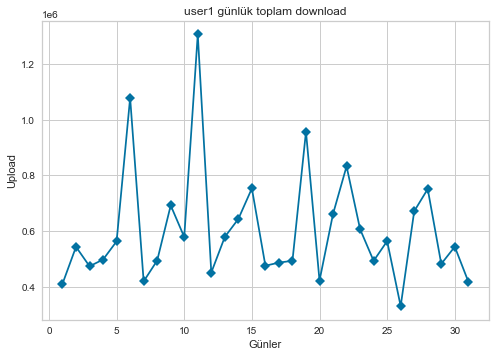

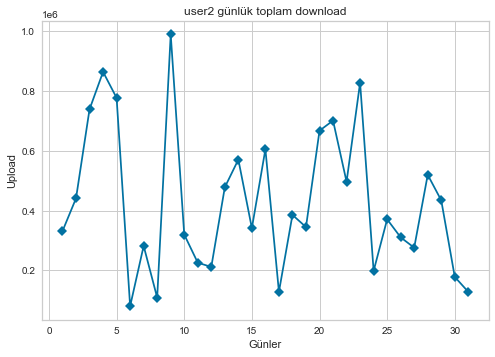

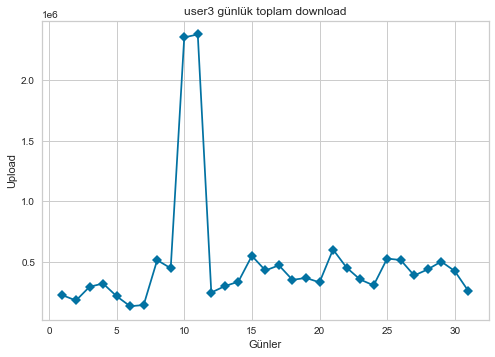

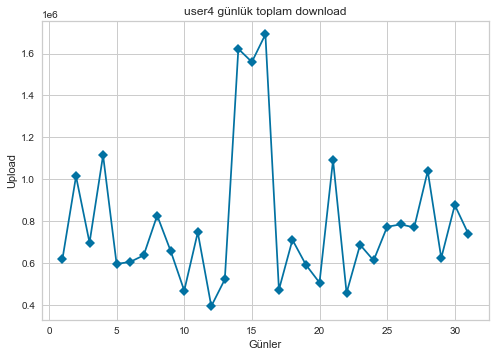

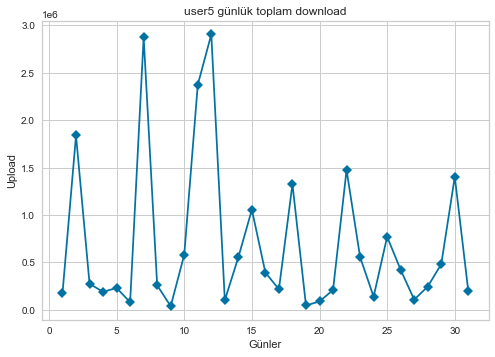

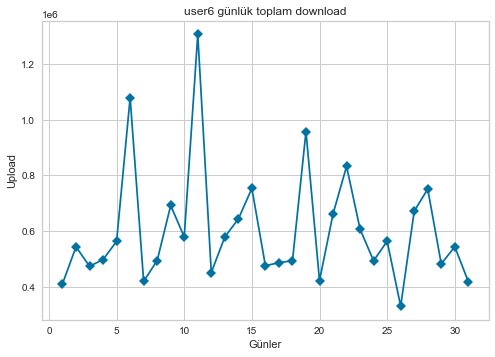

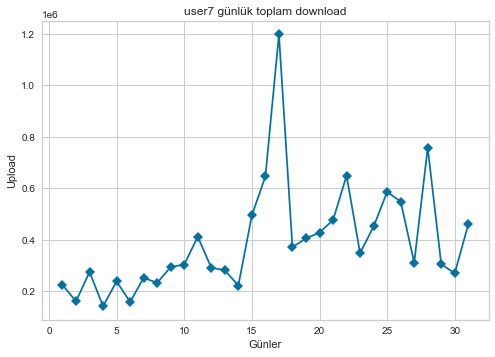

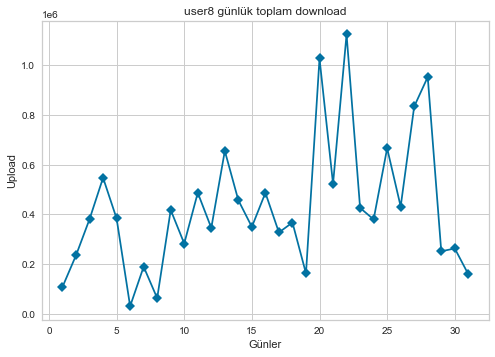

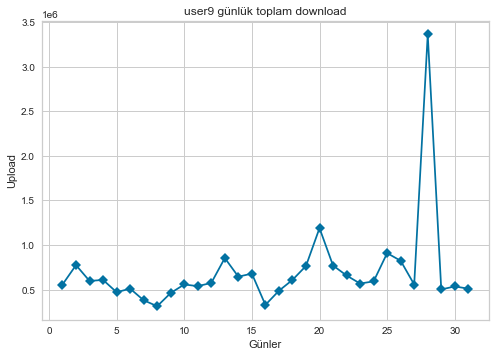

In [190]:
for i in user:
    plt.plot(i.groupby("day").agg({"upload":"sum"}),color="b",marker='D')
    plt.title(f"{i.name.values[0]} günlük toplam download")
    plt.xlabel("Günler")
    plt.ylabel("Upload")
    plt.show()

In [173]:
def usersusages(df): 
    df = df.reset_index()
    n = df.name[0]
    plt.figure(figsize = (15,10))

    plt.subplot(221)
    plt.plot(df.groupby("day").agg({"total_transfer":"sum"}),color="y",marker='D')
    plt.xlabel("Günler")
    plt.ylabel("Toplam Transfer")
    plt.title(f"{n} Günlük Toplam Transfer")

    plt.subplot(222)
    plt.plot(df.groupby("month").agg({"total_transfer":"sum"}),color="b",marker='D')
    plt.xlabel("Ay")
    plt.ylabel("Toplam Transfer")
    plt.title(f"{n} Aylık Toplam Transfer")

    plt.subplot(223)
    plt.plot(user1.groupby("day").agg({"usage_time":"sum"}),color="r",marker='D')
    plt.xlabel("Toplam Kullanım Süresi ")
    plt.ylabel("Saniye")
    plt.title(f"{n} Günlük Kullanım Süresi ")

    plt.subplot(224)
    plt.plot(df.groupby("month").agg({"usage_time":"sum"}),color="g",marker='D')
    plt.xlabel("Toplam Kullanım Süresi")
    plt.ylabel("Saniye")
    plt.title(f"{n} Aylık Kullanım Süresi")
    plt.show()

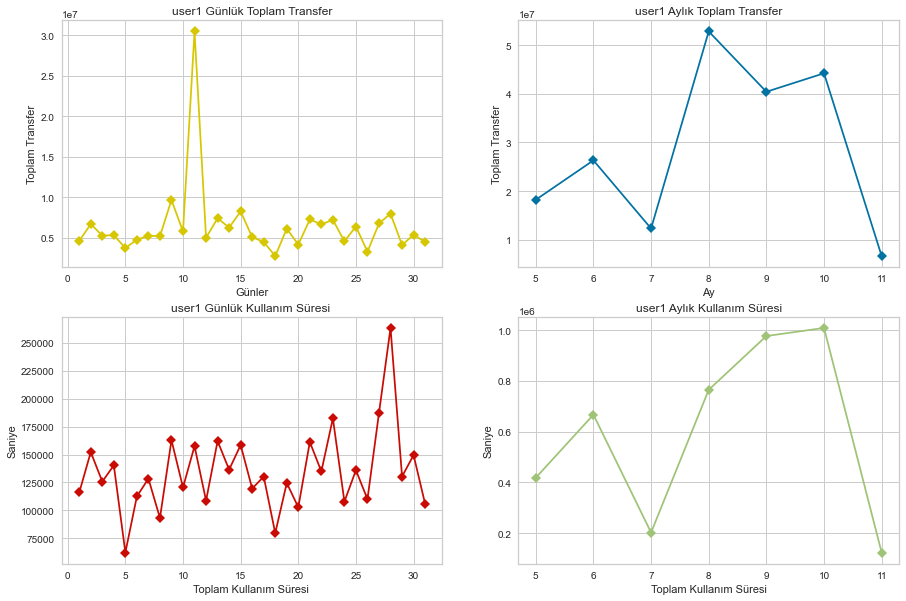

In [174]:
usersusages(user1)

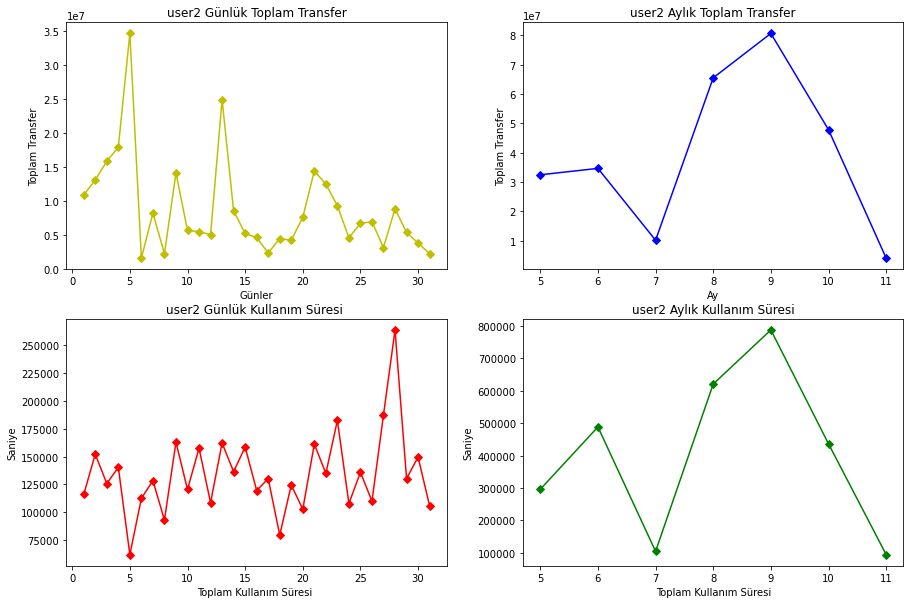

In [31]:
usersusages(user2)

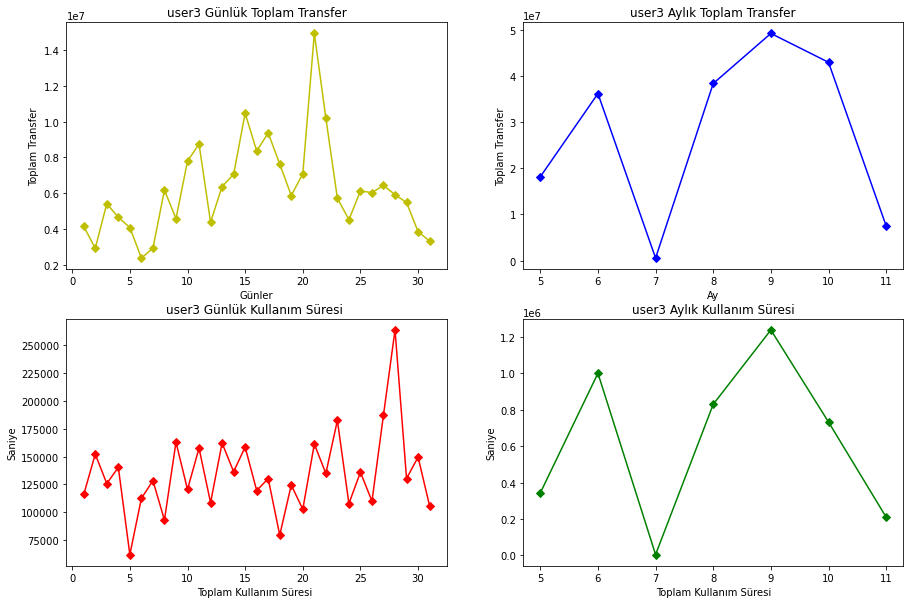

In [32]:
usersusages(user3)

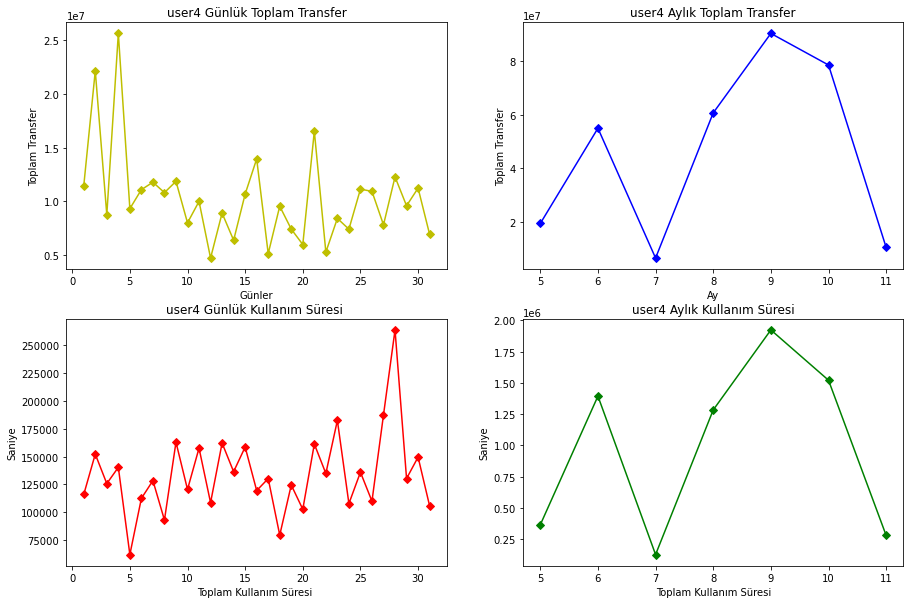

In [33]:
usersusages(user4)

name
user1     6174.311573
user2     6193.371991
user3     8394.479769
user4     9474.287483
user5     4821.648810
user6     6169.998516
user7     8252.513258
user8    14594.555556
user9     8963.452797
Name: usage_time, dtype: float64


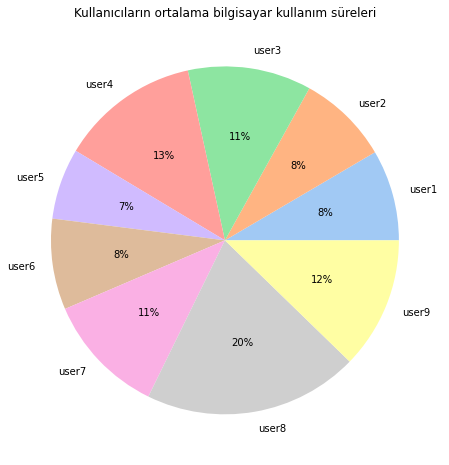

In [34]:
x = []
pv = data.pivot_table(data,"name")["usage_time"]
[x.append(i) for i in pv]
colors = sns.color_palette('pastel')[0:10]
plt.figure(figsize = (10,8))
plt.pie(x, labels = pv.index, colors = colors, autopct='%.0f%%')
plt.title("Kullanıcıların ortalama bilgisayar kullanım süreleri")
print(pv)
plt.show()

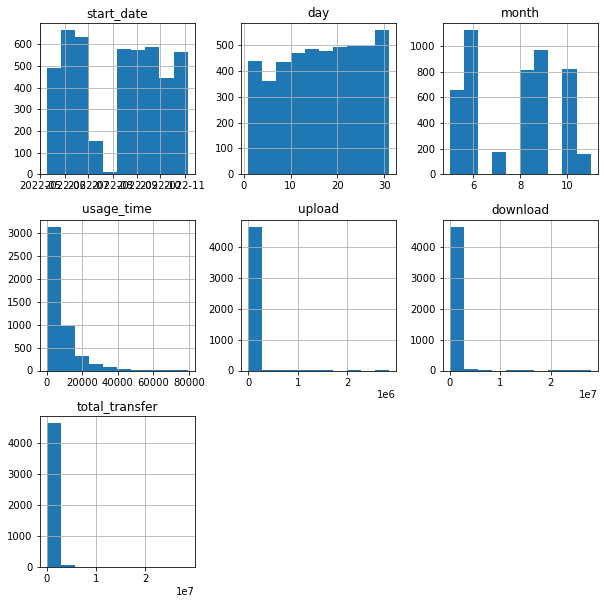

In [35]:
data.hist(figsize = (10,10))

## Sınıflama

In [36]:
data.head()

,name,start_date,start_time1,day,month,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10,02:59:00,10,5,2188,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10,18:53:00,10,5,6596,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10,21:20:00,10,5,5700,10.55.2.253,48:E7:DA:58:22:E9,14080.00,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11,00:37:00,11,5,1560,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.40,46049.28,Idle-Timeout
4,user1,2022-05-11,02:59:00,11,5,712,10.55.2.253,48:E7:DA:58:22:E9,22067.20,10772.48,32839.68,Idle-Timeout


In [37]:
data.groupby("seession_break_reason").size()

seession_break_reason
Idle-Timeout    4359
Lost-Carrier     162
Lost-Service     124
NAS-Reboot         2
User-Request      65
dtype: int64

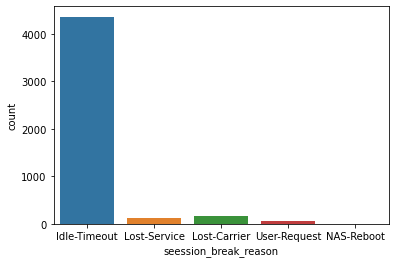

<Figure size 432x288 with 0 Axes>

In [38]:
sns.countplot(data['seession_break_reason'],label="Count")
plt.show()
plt.savefig('session_break_reason countplot')

In [39]:
data.seession_break_reason.unique()

array(['Idle-Timeout', 'Lost-Service', 'Lost-Carrier', 'User-Request',
       'NAS-Reboot'], dtype=object)

In [40]:
#sınıflanacak sütunu etiketliyorum

In [41]:
data["session_label1"] = data.seession_break_reason.values
data.loc[data.session_label1 == 'Idle-Timeout',"session_label1"] = 1
data.loc[data.session_label1 == 'Lost-Service',"session_label1"] = 2
data.loc[data.session_label1 == 'Lost-Carrier',"session_label1"] = 3
data.loc[data.session_label1 == 'User-Request',"session_label1"] = 4
data.loc[data.session_label1 == 'NAS-Reboot',"session_label1"] = 5
data

,name,start_date,start_time1,day,month,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason,session_label1
0,user1,2022-05-10,02:59:00,10,5,2188,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,1
1,user1,2022-05-10,18:53:00,10,5,6596,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,1
2,user1,2022-05-10,21:20:00,10,5,5700,10.55.2.253,48:E7:DA:58:22:E9,14080.00,195153.92,209233.92,Idle-Timeout,1
3,user1,2022-05-11,00:37:00,11,5,1560,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.40,46049.28,Idle-Timeout,1
4,user1,2022-05-11,02:59:00,11,5,712,10.55.2.253,48:E7:DA:58:22:E9,22067.20,10772.48,32839.68,Idle-Timeout,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04,01:11:00,4,11,24872,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout,1
4708,user9,2022-11-04,10:26:00,4,11,1429,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout,1
4709,user9,2022-11-04,20:41:00,4,11,5053,10.55.15.186,DA:2F:97:0E:B7:D0,18995.20,373657.60,392652.80,Idle-Timeout,1
4710,user9,2022-11-05,00:21:00,5,11,31783,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.40,640368.64,Idle-Timeout,1


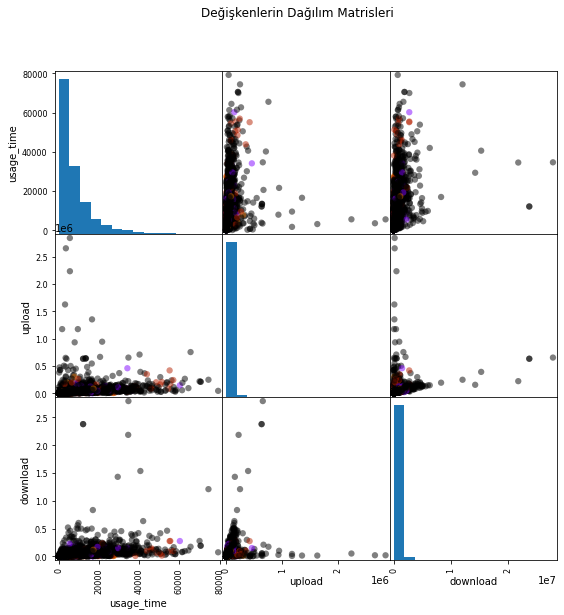

In [42]:
from matplotlib import cm
feature_names = ["usage_time","upload","download"]#total_transfer değişkeni download ile aynı derecede ilişkiye sahip.
X = data[feature_names]
y = data['session_label1']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X,c=y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Değişkenlerin Dağılım Matrisleri')
plt.savefig('data_scatter_matrix')

In [43]:
# grafikteki koyulaşmanın nedeni aşağıda görüldüğü gibi verideki değerlerin %92.5 'i Idle-Timeout 'dur.

In [44]:
data.groupby("seession_break_reason").size().apply(lambda x: x*100/data.shape[0]) 

seession_break_reason
Idle-Timeout    92.508489
Lost-Carrier     3.438031
Lost-Service     2.631579
NAS-Reboot       0.042445
User-Request     1.379457
dtype: float64

### Model Başarı Değerlendirme

In [45]:
#Hangi modeller kullanılacak?

Logistic Regression <br>
Decision Tree <br>
K-Nearest Neighbors <br>
Linear Discriminant Analysis <br>
Gaussian Naive Bayes <br>
Support Vector Machine <br>

In [46]:
#Ön hazırlık

In [47]:
X = data[feature_names]
y = data['session_label1']
y = y.astype('int')

In [48]:
X.head()

,usage_time,upload,download
0,2188,15861.76,333168.64
1,6596,16957.44,212152.32
2,5700,14080.00,195153.92
3,1560,5242.88,40806.40
4,712,22067.20,10772.48


In [49]:
#Modelin başarılarını değerlendirebilmek için eğitim ve test verilerini elde ediyoruz.
#Elde edilen verileri MinMaxScaler yardımı ile ölçeklendiriyoruz. 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.33)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [51]:
X_train.shape

(3157, 3)

In [52]:
X_test.shape

(1555, 3)

In [53]:
y_train.shape

(3157,)

In [54]:
y_test.shape

(1555,)

In [55]:
#Model

### Logistic Regression

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Eğitim verisi için Logistic Regression sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Test verisi için Logistic Regression sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Eğitim verisi için Logistic Regression sınıflandırıcısının doğruluk yüzdesi: 0.92
Test verisi için Logistic Regression sınıflandırıcısının doğruluk yüzdesi: 0.93


### Decision Tree

In [57]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Eğitim verisi için Decision Tree sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Test verisi için Decision Tree sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(clf.score(X_test, y_test)))

Eğitim verisi için Decision Tree sınıflandırıcısının doğruluk yüzdesi: 1.00
Test verisi için Decision Tree sınıflandırıcısının doğruluk yüzdesi: 0.85


Text(0.5, 1.0, 'Eğitim seti için toplam safsızlık ve etkili alfa karşılaştırılması')

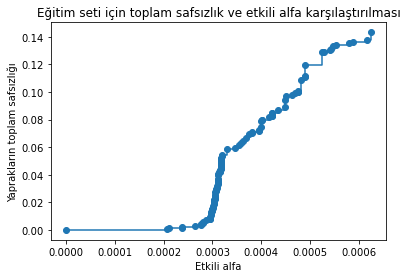

In [58]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Etkili alfa")
ax.set_ylabel("Yaprakların toplam safsızlığı")
ax.set_title("Eğitim seti için toplam safsızlık ve etkili alfa karşılaştırılması")

In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "ccp_alpha: {}".format( ccp_alphas[-1]
    )
)

ccp_alpha: 0.0007806999793331351


In [60]:
# ccp_alfa değeri arttıkça, ağacın daha fazla kısmı budanır, bu da yapraklarının toplam safsızlığını artırır.

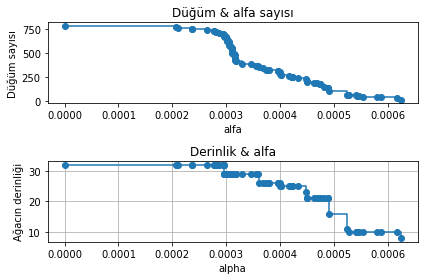

In [61]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alfa")
ax[0].set_ylabel("Düğüm sayısı")
ax[0].set_title("Düğüm & alfa sayısı")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Ağacın derinliği")
ax[1].set_title("Derinlik & alfa")
fig.tight_layout()
plt.grid(True)

In [62]:
# Göründüğü üzere Alfa arttıkça düğüm sayısının ve ağacın derinlik sayısı azalmaktadır.

In [63]:
#Eğitim ve Test verisi için doğruluk ve alfa değerinin karşılaştırılması

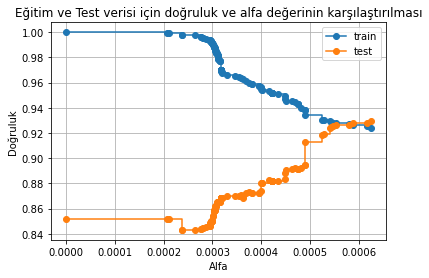

In [64]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alfa")
ax.set_ylabel("Doğruluk")
ax.set_title("Eğitim ve Test verisi için doğruluk ve alfa değerinin karşılaştırılması")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.grid(True)
plt.show()



### K-Nearest Neighbors

In [65]:
knn = KNeighborsClassifier().fit(X_train ,y_train)
print('Eğitim verisi için KNeighbors sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Test verisi için KNeighbors sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(knn.score(X_test, y_test)))

Eğitim verisi için KNeighbors sınıflandırıcısının doğruluk yüzdesi: 0.92
Test verisi için KNeighbors sınıflandırıcısının doğruluk yüzdesi: 0.93


### Linear Discriminant Analysis

In [66]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Eğitim verisi için L.Discriminant Analizi sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Test verisi için L.Discriminant Analizi sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(lda.score(X_test, y_test)))

Eğitim verisi için L.Discriminant Analizi sınıflandırıcısının doğruluk yüzdesi: 0.92
Test verisi için L.Discriminant Analizi sınıflandırıcısının doğruluk yüzdesi: 0.93


In [67]:
data.columns

Index(['name', 'start_date', 'start_time1', 'day', 'month', 'usage_time', 'IP',
       'MAC', 'upload', 'download', 'total_transfer', 'seession_break_reason',
       'session_label1'],
      dtype='object')

In [68]:
data.seession_break_reason.unique()

array(['Idle-Timeout', 'Lost-Service', 'Lost-Carrier', 'User-Request',
       'NAS-Reboot'], dtype=object)

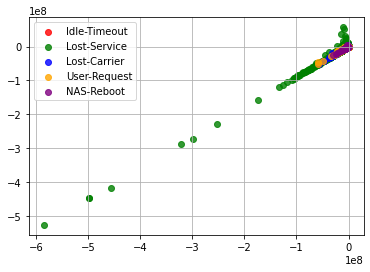

In [69]:
#lineardiscriminant analizi için grafiği oluşturalım
plt.figure()
target_name = data.seession_break_reason.unique()
colors = ['red', 'green', 'blue', 'orange','purple']
lw = 2
data_plot = lda.transform(X)
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4],target_name):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()

### Gaussian Naive Bayes

In [70]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Eğitim verisi için Gaussian Naive Bayes sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Test verisi için Gaussian Naive Bayes sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Eğitim verisi için Gaussian Naive Bayes sınıflandırıcısının doğruluk yüzdesi: 0.91
Test verisi için Gaussian Naive Bayes sınıflandırıcısının doğruluk yüzdesi: 0.91


### Support Vector Machine

In [71]:
svm = SVC()
svm.fit(X_train, y_train)
print('Eğitim verisi için SVM sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Test verisi için SVM sınıflandırıcısının doğruluk yüzdesi: {:.2f}'
     .format(svm.score(X_test, y_test)))

Eğitim verisi için SVM sınıflandırıcısının doğruluk yüzdesi: 0.92
Test verisi için SVM sınıflandırıcısının doğruluk yüzdesi: 0.93


### Tüm modellerin karşılatırılması

In [72]:
models = [
    logreg,
    knn,
    clf,
    svm,
    gnb
]

for i in models:
    y_pred = i.predict(X_test)
    print(i)
    print("-"*20)
    print(f"\nConfusion_Matrix\n{confusion_matrix(y_test,y_pred)}"
         f"\n{classification_report(y_test,y_pred)}")
    print("="*70)

    

LogisticRegression()
--------------------

Confusion_Matrix
[[1453    0    0    0]
 [  36    0    0    0]
 [  47    0    0    0]
 [  19    0    0    0]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97      1453
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        19

    accuracy                           0.93      1555
   macro avg       0.23      0.25      0.24      1555
weighted avg       0.87      0.93      0.90      1555

KNeighborsClassifier()
--------------------

Confusion_Matrix
[[1450    2    1    0]
 [  34    2    0    0]
 [  47    0    0    0]
 [  19    0    0    0]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97      1453
           2       0.50      0.06      0.10        36
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0

## Kümeleme Analizi

In [73]:
#K-means en çok kullanılan algoritmalardan biri olduğundan bu veri seti için bu algoritmadan yaralanacağız.

In [74]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,4712.0,16.287564,8.686592,1.000,9.00,16.00,24.00,31.00
month,4712.0,7.725806,1.838395,5.000,6.00,8.00,9.00,11.00
usage_time,4712.0,7806.292233,9142.549815,1.000,1909.50,4784.00,10161.00,79207.00
upload,4712.0,33820.099885,94926.348890,0.240,6082.56,15329.28,33996.80,2841640.96
download,4712.0,396568.926764,964988.241978,0.904,52024.32,178268.16,459491.84,27902607.36
total_transfer,4712.0,430374.332279,995264.708692,1.120,61870.08,202931.20,499691.52,28552724.48


In [75]:
cls = data.copy()

In [76]:
kdata = cls[["usage_time","download","upload","total_transfer"]]

In [77]:
ssd = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(kdata)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

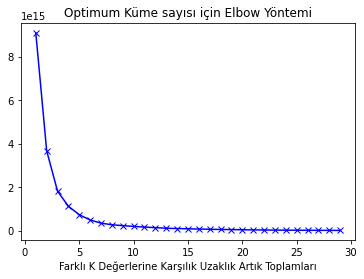

In [78]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [79]:
# küme sayısının net bir şekilde belirlenmesi için aşağıdaki kütüphaneyi indirin

In [80]:
#!pip install yellowbrick

In [81]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\fb190\anaconda3\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\fb190\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\fb190\anaconda3\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Users\fb190\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [82]:
cls.loc[cls.name == "user1","name"] = 1
cls.loc[cls.name == "user2","name"] = 2
cls.loc[cls.name == "user3","name"] = 3
cls.loc[cls.name == "user4","name"] = 4
cls.loc[cls.name == "user5","name"] = 5
cls.loc[cls.name == "user6","name"] = 6
cls.loc[cls.name == "user7","name"] = 7
cls.loc[cls.name == "user8","name"] = 8
cls.loc[cls.name == "user9","name"] = 9

In [83]:
kmeans = KMeans(n_clusters = 9)
kmeans

KMeans(n_clusters=9)

C:\Users\fb190\anaconda3\lib\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


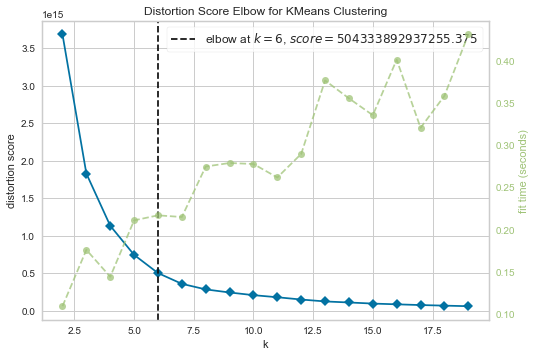

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20)) #2 ile 20 arasındaki kümeleri denemiş olacak
visu.fit(kdata)
visu.poof()

In [85]:
#en optimal küme sayısının 6 olduğu görülüyor.

In [86]:
kmeans = KMeans(n_clusters = 6).fit(kdata)
kmeans

KMeans(n_clusters=6)

In [87]:
k_fit = kmeans.fit(cls[["name","usage_time","upload","download","total_transfer"]])

In [88]:
#merkezler

In [89]:
k_fit.cluster_centers_

array([[4.62485277e+00, 4.84683392e+03, 1.65870160e+04, 1.32070527e+05,
        1.48657586e+05],
       [4.00000000e+00, 2.33445000e+04, 5.35326720e+05, 2.43138560e+07,
        2.48460083e+07],
       [5.62280702e+00, 2.07232632e+04, 1.31883834e+05, 1.72988385e+06,
        1.86177428e+06],
       [3.66666667e+00, 4.80923333e+04, 2.65226240e+05, 1.39041178e+07,
        1.41697570e+07],
       [4.99615014e+00, 1.38865977e+04, 6.16960099e+04, 6.84936244e+05,
        7.46542558e+05],
       [5.11904762e+00, 2.22063571e+04, 1.41003581e+05, 4.16883858e+06,
        4.31064600e+06]])

In [90]:
k_fit = kmeans.fit(kdata)

In [91]:
#merkezler

In [92]:
clusters = kmeans.labels_
pd.DataFrame({"name":data.name, "Clusters":clusters})

,name,Clusters
0,user1,1
1,user1,1
2,user1,1
3,user1,1
4,user1,1
...,...,...
4707,user9,0
4708,user9,1
4709,user9,1
4710,user9,4


In [93]:
#her kullanıcın hangi kümeye ait olduğunun bilgisi elimize ulaştı

In [94]:
k_fit.cluster_centers_

array([[2.07195844e+04, 1.76996924e+06, 1.31701472e+05, 1.90173556e+06],
       [4.84683392e+03, 1.32070527e+05, 1.65870160e+04, 1.48657586e+05],
       [2.33445000e+04, 2.43138560e+07, 5.35326720e+05, 2.48460083e+07],
       [4.80923333e+04, 1.39041178e+07, 2.65226240e+05, 1.41697570e+07],
       [1.39194165e+04, 6.86466221e+05, 6.18470547e+04, 7.48217185e+05],
       [2.20969444e+04, 4.36091108e+06, 1.45170773e+05, 4.50683790e+06]])

In [95]:
kdata["Kume_No"] = clusters
kdata

,usage_time,download,upload,total_transfer,Kume_No
0,2188,333168.64,15861.76,349030.40,1
1,6596,212152.32,16957.44,229109.76,1
2,5700,195153.92,14080.00,209233.92,1
3,1560,40806.40,5242.88,46049.28,1
4,712,10772.48,22067.20,32839.68,1
...,...,...,...,...,...
4707,24872,2390753.28,107960.32,2495610.88,0
4708,1429,209674.24,11407.36,221081.60,1
4709,5053,373657.60,18995.20,392652.80,1
4710,31783,593766.40,46602.24,640368.64,4


In [96]:
clusters = k_fit.labels_
np.unique(clusters) # 4 küme belirlemiştik

array([0, 1, 2, 3, 4, 5])

In [97]:
centers = kmeans.cluster_centers_
centers

array([[2.07195844e+04, 1.76996924e+06, 1.31701472e+05, 1.90173556e+06],
       [4.84683392e+03, 1.32070527e+05, 1.65870160e+04, 1.48657586e+05],
       [2.33445000e+04, 2.43138560e+07, 5.35326720e+05, 2.48460083e+07],
       [4.80923333e+04, 1.39041178e+07, 2.65226240e+05, 1.41697570e+07],
       [1.39194165e+04, 6.86466221e+05, 6.18470547e+04, 7.48217185e+05],
       [2.20969444e+04, 4.36091108e+06, 1.45170773e+05, 4.50683790e+06]])

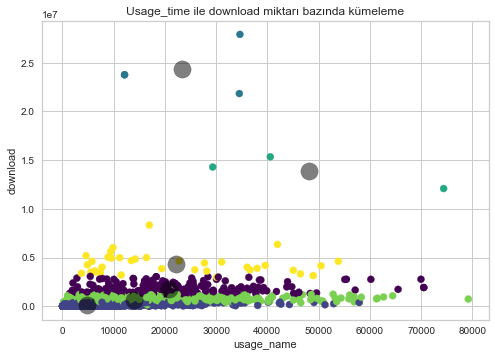

In [98]:
plt.scatter(kdata.iloc[:,0], kdata.iloc[:,1],c = clusters, s=50, cmap = "viridis")
plt.scatter(centers[:,0],centers[:,1], c = "black", s = 300, alpha = 0.5)
plt.title("Usage_time ile download miktarı bazında kümeleme")
plt.xlabel("usage_name")
plt.ylabel("download")
plt.show()

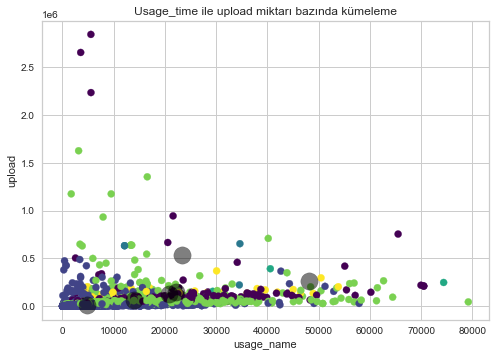

In [99]:
plt.scatter(kdata.iloc[:,0], kdata.iloc[:,2],c = clusters,s = 50, cmap = "viridis")
plt.scatter(centers[:,0],centers[:,2], c = "black", s = 300, alpha = 0.5)
plt.title("Usage_time ile upload miktarı bazında kümeleme")
plt.xlabel("usage_name")
plt.ylabel("upload")
plt.show()

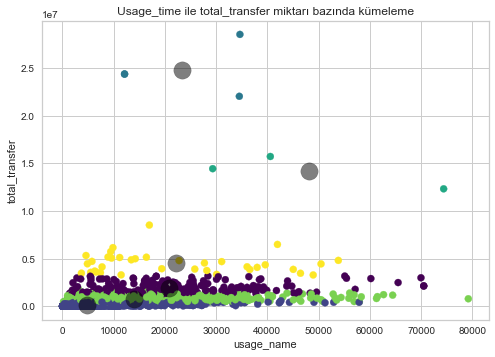

In [100]:
plt.scatter(kdata.iloc[:,0], kdata.iloc[:,3],c = clusters,s = 50, cmap = "viridis")
plt.scatter(centers[:,0],centers[:,3], c = "black", s = 300, alpha = 0.5)
plt.title("Usage_time ile total_transfer miktarı bazında kümeleme")
plt.xlabel("usage_name")
plt.ylabel("total_transfer")
plt.show()

### Association Rule Learning (Apriori,Birliktelik Analizi)

In [101]:
#!pip install mlxtend

In [102]:
user1.month.unique()

array([ 5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [103]:
user2.month.unique()

array([ 5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [104]:
user3.month.unique()

array([ 5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [105]:
#öncelikle aykırı değerleri eşik değerlere göre sınırlandıralım

In [192]:
def outlier(dataframe):
    """
    Outlier detection function
    ==========================
    
    dataframe: 
        Like format DataFrame[val]
    
    Examples:
        low, up = outlier(df["value"])
        
    returns:
        lower_limit 
        upper_limit 
        
    """
    Q1 = dataframe.quantile(0.01)
    Q3 = dataframe.quantile(0.90)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    low_outlier = (dataframe<(lower_limit))
    up_outlier = (dataframe>(upper_limit))
    conclusion = (low_outlier | up_outlier)
    return lower_limit,upper_limit

In [193]:
def replace_with_thresholds(df,var):
    low,up = outlier(df[var])
    df.loc[(df[var]<low),var] = low
    df.loc[(df[var]>up),var] = up


In [194]:
#üç değişken için değerler sınırlandırıldı
for i in ["usage_time","download","upload","total_transfer"]:
    replace_with_thresholds(data,i)

In [195]:
for i in ["usage_time","download","upload","total_transfer"]:
    print(f"\n{i} değişkeninin aykırı değerleri\n")
    outlierbilgi(data[i])


usage_time değişkeninin aykırı değerleri

Toplam Gözlem Sayisi : 4712
Ortalama :  7715.153650254669
Alt sinir değeri :-27559.550000
Üst sinir değeri :46079.250000
Toplam Aykırı Gözlem :  0
Series([], Name: usage_time, dtype: float64)

download değişkeninin aykırı değerleri

Toplam Gözlem Sayisi : 4712
Ortalama :  350341.1617843794
Alt sinir değeri :-1342188.246000
Üst sinir değeri :2237874.202000
Toplam Aykırı Gözlem :  0
Series([], Name: download, dtype: float64)

upload değişkeninin aykırı değerleri

Toplam Gözlem Sayisi : 4712
Ortalama :  27734.615502207154
Alt sinir değeri :-98450.405000
Üst sinir değeri :164440.662200
Toplam Aykırı Gözlem :  0
Series([], Name: upload, dtype: float64)

total_transfer değişkeninin aykırı değerleri

Toplam Gözlem Sayisi : 4712
Ortalama :  384745.46658107
Alt sinir değeri :-1465979.978000
Üst sinir değeri :2444748.230000
Toplam Aykırı Gözlem :  0
Series([], Name: total_transfer, dtype: float64)


In [110]:
#aykırı analizler alt ve üst limitler ile değiştirildi bu verinin daha doğru bir şekilde temisil edilmesini sağlar.

In [111]:
#Her bir IP'yi birer bilgisayar olarak düşünürsek kullanıcıların ortak özelliklerini barındıran bilgilere ihtiyacımız var.

In [112]:
#Kullanıcıların ortak ipleri ile harcanan süreleri görelim

In [113]:
def withinshow(df1,df2,val):
    df1name = df1.name[0]
    df2name = df2.name.values[0]
    
    result = df1[df1[val].isin(df2[val])][val].unique()
    print(f"{df1name} kullanıcısının {df2name} kullanıcısı ile ortak {len(result)} adet {str(val)} bulunmakta.\n")
    
    return result
    

In [114]:
withinshow(user1,user2,"IP")

user1 kullanıcısının user2 kullanıcısı ile ortak 4 adet IP bulunmakta.



array(['10.55.10.97', '10.55.15.38', '10.55.13.179', '10.55.6.11'],
      dtype=object)

In [115]:
withinshow(user1,user3,"IP")

user1 kullanıcısının user3 kullanıcısı ile ortak 7 adet IP bulunmakta.



array(['10.55.7.89', '10.55.14.83', '10.55.14.221', '10.55.0.55',
       '10.55.6.191', '10.55.13.237', '10.55.12.106'], dtype=object)

**Her kullanıcının aylara göre kullandıkları ip sayıları**

In [116]:
sumdata = data.pivot_table(values = "IP", index = ["name"], columns=["month"], aggfunc="size")
sumdata.loc["sum"] = sumdata.sum() 
sumdata

month,5,6,7,8,9,10,11
name,,,,,,,
user1,100.0,124.0,51.0,135.0,120.0,127.0,17.0
user2,93.0,101.0,16.0,88.0,97.0,46.0,16.0
user3,53.0,111.0,1.0,110.0,138.0,80.0,26.0
user4,49.0,180.0,9.0,112.0,190.0,155.0,32.0
user5,48.0,107.0,8.0,26.0,63.0,63.0,21.0
user6,100.0,124.0,51.0,135.0,120.0,127.0,17.0
user7,70.0,160.0,15.0,82.0,96.0,93.0,12.0
user8,62.0,88.0,5.0,10.0,11.0,49.0,NaN
user9,83.0,126.0,14.0,114.0,133.0,83.0,19.0


In [117]:
user8.month.unique()#user8 11. ayda hiç bir ip kullanmamıs

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

In [118]:
us1_ip = user1[user1.month==8]["IP"].values[:30]
us2_ip = user2[user2.month==8]["IP"].values[:30]
us3_ip = user3[user3.month==8]["IP"].values[:30]
us4_ip = user4[user4.month==8]["IP"].values[:30]
us5_ip = user5[user5.month==8]["IP"].values[:30]
us6_ip = user6[user6.month==8]["IP"].values[:30]
us7_ip = user7[user7.month==8]["IP"].values[:30]
us8_ip = user8[user8.month==8]["IP"].values[:30]
us9_ip = user9[user9.month==8]["IP"].values[:30]
all = [us1_ip,
       us2_ip,
       us3_ip,
       us4_ip,
       us5_ip,
       us6_ip,
       us7_ip,
       us8_ip,
       us9_ip]

In [119]:
dict = {"mayıs":all}

In [120]:
df = pd.DataFrame(dict,index = users)
df

,mayıs
user1,"[10.55.0.89, 10.55.0.89, 10.55.0.89, 10.55.0.8..."
user2,"[10.55.15.63, 10.55.15.63, 10.55.1.99, 10.55.6..."
user3,"[10.55.13.218, 10.55.13.218, 10.55.13.218, 10...."
user4,"[10.55.11.168, 10.55.11.168, 10.55.11.168, 10...."
user5,"[10.55.0.195, 10.55.0.195, 10.55.11.46, 10.55...."
user6,"[10.55.0.89, 10.55.0.89, 10.55.0.89, 10.55.0.8..."
user7,"[10.55.13.44, 10.55.13.226, 10.55.13.44, 10.55..."
user8,"[10.55.10.168, 10.55.15.161, 10.55.12.229, 10...."
user9,"[10.55.13.84, 10.55.13.84, 10.55.14.156, 10.55..."


In [121]:
#mayıs ayında kullanılan ip leri tablo haline getirdik

In [122]:
from itertools import chain
new_data = list(chain(*df.values))
new_data[0][:2] #user1 mayıs ayı ipleri

array(['10.55.0.89', '10.55.0.89'], dtype=object)

In [123]:
#Veri önişleme

In [124]:
te = TransactionEncoder()
te_data = te.fit(new_data).transform(new_data)
df = pd.DataFrame(te_data, columns = te.columns_)
df

,10.55.0.102,10.55.0.195,10.55.0.230,10.55.0.25,10.55.0.55,10.55.0.75,10.55.0.89,10.55.1.141,10.55.1.177,10.55.1.20,...,10.55.8.203,10.55.8.231,10.55.8.49,10.55.8.94,10.55.9.137,10.55.9.161,10.55.9.197,10.55.9.241,10.55.9.55,10.89.3.47
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
5,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,True,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
#Buradaki işlem biraz uzun sürebilir çünkü 8. aydaki tüm ip leri karşılaştırmaktadır.

In [126]:
# min_support = Tüm kombinasyonların support değerini istemiyorum bu yüzden belirli bir eşik değerini supporta göre getir.
# use_colnames = True, sutün isimlerini göster.
# verbose = 1, Toplam kombinasyon sayısını gösterir. 
df1 = apriori(df.iloc[:,:20], min_support = 0.02, use_colnames = True, verbose=1)
df1
# burada veri setinin ilk 20 sütunu alındı.

Processing 55 combinations | Sampling itemset size 54


,support,itemsets
0,0.111111,(10.55.0.102)
1,0.111111,(10.55.0.195)
2,0.111111,(10.55.0.230)
3,0.111111,(10.55.0.25)
4,0.222222,(10.55.0.55)
...,...,...
62,0.111111,"(10.55.1.20, 10.55.10.230, 10.55.0.195, 10.55...."
63,0.111111,"(10.55.10.163, 10.55.10.230, 10.55.0.195, 10.5..."
64,0.111111,"(10.55.1.20, 10.55.10.230, 10.55.10.236, 10.55..."
65,0.111111,"(10.55.10.168, 10.55.10.69, 10.55.10.184, 10.5..."


In [127]:
#burada confidence metriğini kullanmayı düşünerek minimum eşik değerini 0.2 olarak aldım.

In [128]:
association_rules(df1, metric = "confidence", min_threshold = 0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10.55.0.25),(10.55.0.102),0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
1,(10.55.0.102),(10.55.0.25),0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
2,(10.55.0.75),(10.55.0.102),0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
3,(10.55.0.102),(10.55.0.75),0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
4,(10.55.1.20),(10.55.0.195),0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
...,...,...,...,...,...,...,...,...,...
253,(10.55.1.20),"(10.55.10.163, 10.55.10.230, 10.55.0.195, 10.5...",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
254,(10.55.10.163),"(10.55.1.20, 10.55.10.230, 10.55.0.195, 10.55....",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
255,(10.55.0.195),"(10.55.1.20, 10.55.10.230, 10.55.10.236, 10.55...",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
256,(10.55.10.236),"(10.55.1.20, 10.55.10.230, 10.55.0.195, 10.55....",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf


Yukarıdaki antecedents sütunundaki  ip'ye ait bilgisayar kullanıcısına consequents sütunundaki karşılık gelen ip önerilmektedir.<br>

Daha Farklı kombinasyonlar deneyerek daha başarılı tahminlere ulaşabiliriz ancak bu uygulamanın tüm boyut yüksekliği mevcut ram boyutunu aşacağı için bu bilgisayarda verinin belli bir kısmı uygulanmıştır.